In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
m_file = "data/mouse_drug_data.csv"
c_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file_m = pd.read_csv(m_file)
file_c = pd.read_csv(c_file)
file_c.head()

# Combine the data into a single dataset
file_merge = pd.merge(file_m, file_c,
                                 how='inner', on='Mouse ID')
file_merge.head()
# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
T_T = file_merge[['Drug','Timepoint','Tumor Volume (mm3)']]
T_T_mean = pd.DataFrame(T_T).groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame

# Preview DataFrame
T_T_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
T_T_SE = pd.DataFrame(T_T).groupby(['Drug','Timepoint']).sem(1)

# Convert to DataFrame
# Preview DataFrame
T_T_SE.reset_index()

Big_Table_se = T_T_SE.reset_index().pivot(index = "Timepoint", columns = 'Drug', values = 'Tumor Volume (mm3)')
little_t_se = Big_Table_se[["Capomulin","Infubinol",'Ketapril','Placebo']]
little_t_se




Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Big_Table = T_T_mean.reset_index().pivot(index = "Timepoint", columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
Big_Table
little_t = Big_Table[["Capomulin","Infubinol",'Ketapril','Placebo']]
little_t

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


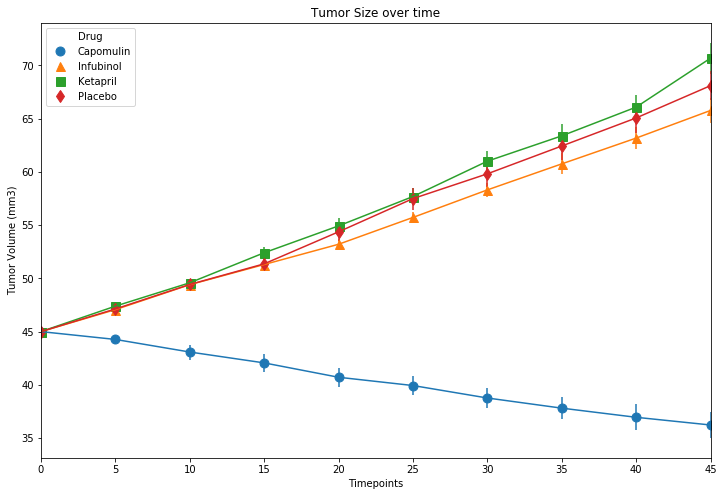

In [5]:
#plot error bars
ax = little_t.plot(figsize=(12,8), yerr = little_t_se, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
little_t.plot(figsize=(12,8), style=['o', '^', 's', 'd'], markersize=9, ax = ax)
ax.set_xlabel("Timepoints")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Size over time")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
M_T = file_merge[['Drug','Timepoint','Metastatic Sites']]
M_T_mean = pd.DataFrame(M_T).groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame

# Preview DataFrame
M_T_mean
# Pivot the data on the Drugs we want to see 
Big_Table = M_T_mean.reset_index().pivot(index = "Timepoint", columns = 'Drug', values = 'Metastatic Sites')
# Result only the drugs
little_m = Big_Table[["Capomulin","Infubinol",'Ketapril','Placebo']]
# Preview that Reformatting worked
little_m

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
M_T_SE = pd.DataFrame(M_T).groupby(['Drug','Timepoint']).sem(1)
# Pivot the data 
Big_Table_se = M_T_SE.reset_index().pivot(index = "Timepoint", columns = 'Drug', values = 'Metastatic Sites')
#only show the drugs we want
little_m_se = Big_Table_se[["Capomulin","Infubinol",'Ketapril','Placebo']]
#Preview
little_m_se

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked



# TA's Note this was done above

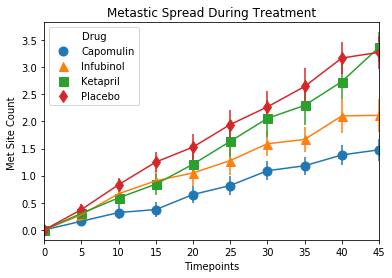

In [11]:
#plot error bars
ax = little_m.plot( yerr = little_m_se, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
little_m.plot( style=['o', '^', 's', 'd'], markersize=9, ax = ax)
ax.set_xlabel("Timepoints")
ax.set_ylabel("Met Site Count ")
ax.set_title("Metastic Spread During Treatment")
plt.show()

In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
file_merge.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [14]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mc = file_merge[['Drug','Timepoint','Mouse ID']]
mc_mean = pd.DataFrame(mc).groupby(['Drug','Timepoint']).count()
# Convert to DataFrame

# Preview DataFrame
mc_mean['Mouse ID'] = mc_mean['Mouse ID']/25*100
mc_mean
# Pivot the data on the Drugs we want to see 
Big_MC = mc_mean.reset_index().pivot(index = "Timepoint", columns = 'Drug', values = 'Mouse ID')
Big_MC
# Result only the drugs
little_mc = Big_MC[["Capomulin","Infubinol",'Ketapril','Placebo']]
# Preview that Reformatting worked
little_mc


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


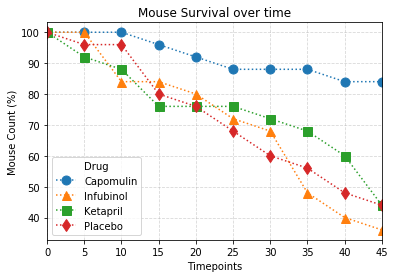

In [16]:
#plot error bars
ax = little_mc.plot(style=['o:', '^:', 's:', 'd:'], markersize=9)
#reset color cycle so that the marker colors match

#plot the markers
ax.set_xlabel("Timepoints")
ax.set_ylabel("Mouse Count (%)")
ax.set_title("Mouse Survival over time")
ax.grid(which='major', axis="both", alpha = 0.5,linestyle='--')
plt.show()

In [17]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
# use the last timepoint and calculate the percent change based on a 45mms tumor starting size
summary = ((little_t.iloc[9:]-45)/45*100).unstack().reset_index().rename(columns = {0:"Percent Change"})
summary = summary[["Drug","Percent Change"]]
summary

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


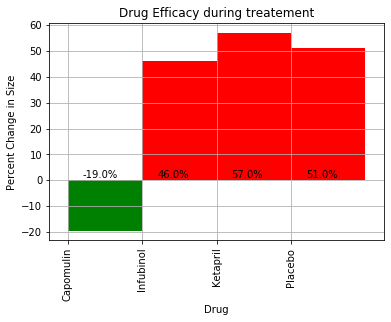

<Figure size 432x288 with 0 Axes>

In [24]:
#ax = summary.plot.bar(style=['r','r','r','r'],legend=False)
#ax.set_xlabel("Drug")
#ax.set_ylabel("% Tumor Volume Change")
#ax.set_title("Tumor change over 45 Day Treatment")
#ax.grid(which='major', axis="both", alpha = 1,linestyle='--')

bx = summary.plot.bar(x = "Drug", y= "Percent Change", color=['Green', 'r', 'r','r'], width = 1, align ='edge', legend=False)
bx.grid(zorder=0, which='major')
for i,v in enumerate(summary["Percent Change"]): 
    bx.text(i +.2, 1 ,str(round(v,0))+'%')
bx.set_ylabel("Percent Change in Size")
bx.set_title("Drug Efficacy during treatement")
plt.show()
#Save the figure
plt.figure().savefig('plot.jpg')

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)